**Reinforcement Machine Learning(RL):** is a type of machine learing where agents learn by trial and error ,using feedback in terms of rewars and penlaties.
* Agent
* Enviroment
* State
* Action
* Policy
* Reward
* Penalty

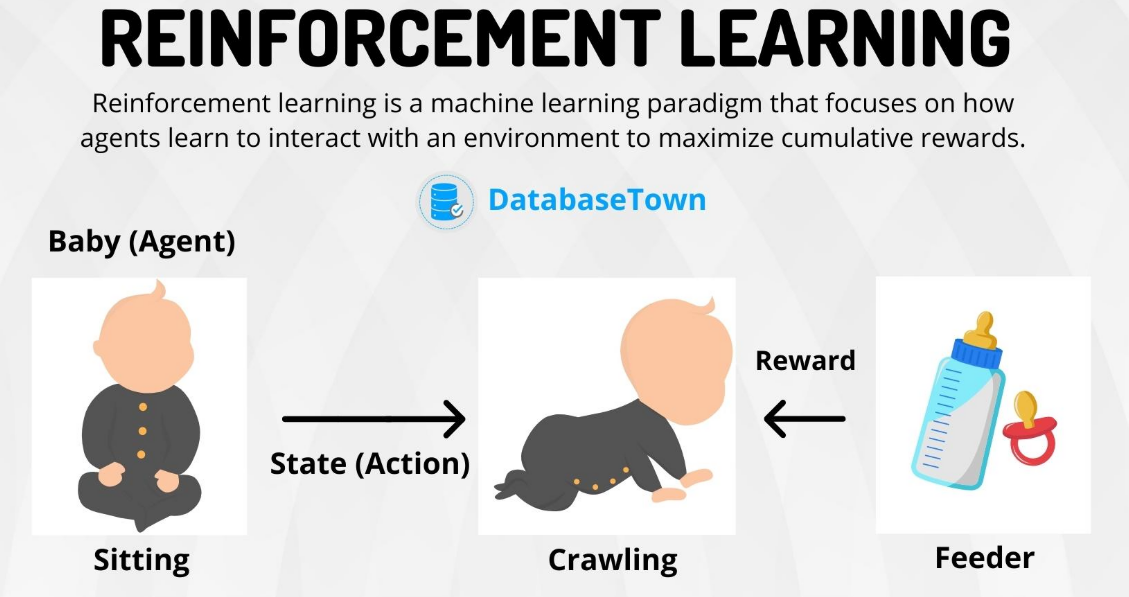

In [ ]:
import numpy as np
import random

In [ ]:
states=[0,1] # 0: Dark , 1: Bright

In [ ]:
actions=[0,1] # 0 Do nothing, 1 Turn On light

In [ ]:
# states * actions
Q=np.zeros((len(states),len(actions)),dtype=np.int32)

In [ ]:
print(Q)

[[0 0]
 [0 0]]


In [ ]:
alpha=0.1 #Learning Rate
gamma=0.9 #Discount Factor
epsilon=0.2 #Exploration Rate
episodes=100 #Training Runs

In [ ]:
# Environment Function
def get_next_state(action):
  if action == 1:
    return 1
  else:
    return 0


In [ ]:
# Reward function
def get_reward(state):
  if state == 1:
    return 10
  else:
    return 0

In [ ]:
#Learning Loop or Training
for episode in range(episodes):
  state=0
  action=random.choice(actions)
  next_state=get_next_state(action)
  reward=get_reward(next_state)
  Q[state,action]=Q[state,action]+alpha*(reward+gamma*np.max(Q[next_state,:])-Q[state,action])


In [ ]:
print('Learned Q-Table')
print(Q)

Learned Q-Table
[[0 1]
 [0 0]]


In [ ]:
state=int(input('Enter Room State : 0=Dark , 1=Bright: \t'))
for step in range(10):
  action=actions[np.argmax(Q[state])]
  print('Action: ',action)
  state=get_next_state(action)
  print('State: ','Bright' if state==1 else 'Dark')
  reward=get_reward(state)
  print('Reward: ',reward)

print('\n Simulation Complete -Light Control Done')




Enter Room State : 0=Dark , 1=Bright: 	0
Action:  1
State:  Bright
Reward:  10
Action:  0
State:  Dark
Reward:  0
Action:  1
State:  Bright
Reward:  10
Action:  0
State:  Dark
Reward:  0
Action:  1
State:  Bright
Reward:  10
Action:  0
State:  Dark
Reward:  0
Action:  1
State:  Bright
Reward:  10
Action:  0
State:  Dark
Reward:  0
Action:  1
State:  Bright
Reward:  10
Action:  0
State:  Dark
Reward:  0

 Simulation Complete -Light Control Done


## One More Example:

In [ ]:
actions=['Study','Watch TV']

In [ ]:
rewards={
    'Study':10,
    'Watch TV':-5

}

In [ ]:
Q={
    'Study':0,
    'Watch TV':0
}

In [ ]:
learning_rate=0.1
discount_factor=0.9
exploration_rate=0.2
episodes=100


In [ ]:
for day in range(episodes):
   action=random.choice(actions)
   # Reward should be based on the chosen action, not a leftover 'next_state' variable
   reward=rewards[action]
   Q[action]=Q[action]+learning_rate*reward

In [ ]:
print(Q)

{'Study': 48.0, 'Watch TV': -26.0}


In [ ]:
best_action=max(Q,key=Q.get)
print('Best Action: ',best_action)

Best Action:  Study


### A delivery agent model must learn which action is better
   * actions: ['Fast','Slow']

In [ ]:
actions=['Fast','Slow']

In [ ]:
rewards={
    'Fast':15,
    'Slow':-5
}

In [ ]:
Q={
    'Fast':0,
    'Slow':0
}

In [58]:
learning_rate=0.1
episodes=50

In [59]:
fast_history=[]
slow_history=[]

In [60]:
# Learing Loop
for step in range(episodes):
  action=random.choice(actions)
  reward=rewards[action]
  Q[action]=Q[action]+learning_rate*(reward-Q[action])
  fast_history.append(Q['Fast'])
  slow_history.append(Q['Slow'])



In [61]:
print (Q)

{'Fast': 13.670559282052126, 'Slow': -4.709251314984799}


In [62]:
best_action=max(Q,key=Q.get)
print('Best Action: ',best_action)

Best Action:  Fast


In [63]:
import matplotlib.pyplot as plt

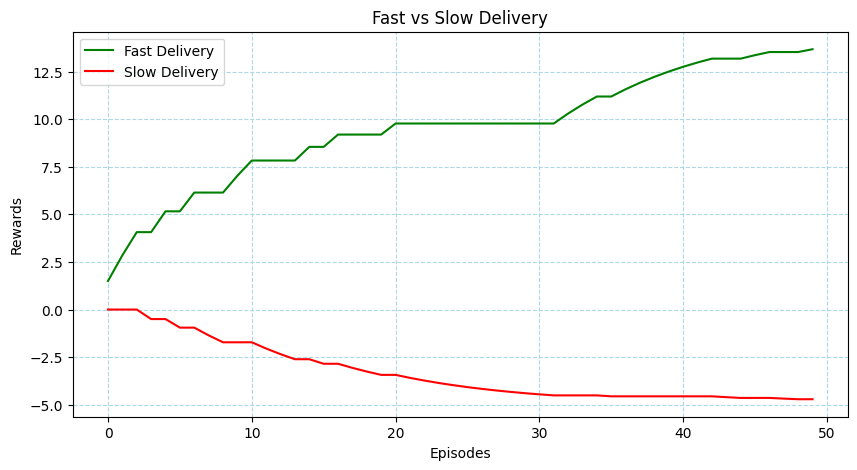

In [67]:
plt.figure(figsize=(10,5))
plt.plot(fast_history,label='Fast Delivery', color='green')
plt.plot(slow_history,label='Slow Delivery',color='red')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.grid(True,linestyle='--',color='lightblue')
plt.title('Fast vs Slow Delivery')
plt.legend()
plt.show()
